<a href="https://colab.research.google.com/github/lakshmi14k/DSEMT/blob/main/DSEMT_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML DATA CLEANING AND FEATURE SELECTION**

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important. Answer the following questions:

• What are the data types? (Only numeric and categorical)

• Are there missing values?

• What are the likely distributions of the numeric variables?

• Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

• Which independent variables have missing data? How much?

• Do the training and test sets have the same data?

• n the predictor variables independent of all the other predictor variables?

• Which predictor variables are the most important?

• Do the ranges of the predictor variables make sense?

• What are the distributions of the predictor variables?

• Remove outliers and keep outliers (does it have an effect of the final predictive model)?

• Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

• For categorical data, calculate the accuracy and a confusion matrix.

**DATASET:** https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download

**DESCRIPTION:**This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features. The aim of the Notebook is to check the quality of the data and determine which features are important.



**The data set consists of:**

**COUNT VARIABLES:** These variables are typically discrete and can follow a Poisson or binomial distribution, depending on the nature of the count.

Example: artist_count

**YEAR/MONTH/DAY VARIABLES:** These variables are categorical and can follow a uniform distribution within the range of possible values.

Example: released_year, released_month, released_day

**NUMERIC VARIABLES:** These variables might follow various distributions.

Example: streams, bpm, danceability_%

**STREAMS:** Skewed distribution, often right-skewed (positively skewed) due to popular songs having significantly more streams.

**BPM:** Depending on the genre, it might follow a normal distribution or be skewed towards certain BPM ranges.

**DANCEABILITY, VALENCE, ENERGY:** These could follow normal distributions or have specific shapes based on music genres.

**PERCENTAGE VARIABLES:** These variables are bounded between 0% and 100%, and their distributions might resemble a beta distribution or a skewed distribution depending on the genre and characteristics of the songs.

Example: danceability_%, valence_%, energy_%

**OTHER AUDIO FEATURES:** These might have diverse distributions based on the audio characteristics of the songs. For example, acousticness might be right skewed if most songs are not acoustic.

Example: acousticness_%, instrumentalness_%, liveness_%, speechiness_%

The aim of this project is to find out what audio feature makes a song to be more successful.

**IMPORTING THE NECESSARY LIBRARIES**

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from statsmodels.graphics.gofplots import qqplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

**READING THE DATASET FROM GITHUB**

In [308]:
dataset = pd.read_csv('https://raw.githubusercontent.com/lakshmi14k/DSEMT/main/Spotify-2023.csv', encoding='ISO-8859-1')

**DISPLAYING THE FIRST 5 ROWS**

In [309]:
dataset.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


**DISPLAYING THE LAST 5 ROWS**

In [310]:
dataset.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


**Q1) WHAT ARE THE TYPE OF DATATYPES? (ONLY NUMERICAL AND CATEGORICAL)**

In [311]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

The data consists of 23 columns.

**NUMERICAL VALUES:**

**Count: 20**

1.	artist_count: Number of artists contributing to the song.

2.	released_year: Year when the song was released.

3.	released_month: Month when the song was released.

4.	released_day: Day of the month when the song was released.

5.	in_spotify_playlists: Number of Spotify playlists the song is included in.

6.	in_spotify_charts: Presence and rank of the song on Spotify charts.

7.	streams: Total number of streams on Spotify.

8.	in_apple_playlists: Number of Apple Music playlists the song is included in.

9.	in_apple_charts: Presence and rank of the song on Apple Music charts.

10.	in_deezer_playlists: Number of Deezer playlists the song is included in.

11.	in_deezer_charts: Presence and rank of the song on Deezer charts.

12.	in_shazam_charts: Presence and rank of the song on Shazam charts.

13.	bpm: Beats per minute, a measure of song tempo.

14.	danceability_%: Percentage indicating how suitable the song is for dancing.

15.	valence_%: Positivity of the song's musical content.

16.	energy_%: Perceived energy level of the song.

17.	acousticness_%: Amount of acoustic sound in the song.

18.	instrumentalness_%: Amount of instrumental content in the song.

19.	liveness_%: Presence of live performance elements.

20.	speechiness_%: Number of spoken words in the song.

According to the code, streams, in_deezer_playlists and in_shazam_playlists are categorized as “object” datatype since they consist of numerical value which contain a “comma” in between the values.
But according to visual interpretation, they are considered numeric values.

**CATEGORICAL VALUES:**

**Count: 4**

1.	track_name: Name of the song.

2.	artist(s)_name: Name of the artist(s) of the song.

3.	key: Key of the song.

4.	mode: Mode of the song (major or minor).

**Q2) ARE THERE MISSING VALUES?**

In [312]:
dataset = dataset.drop(index = 574)
dataset['streams'] = dataset['streams'].astype(int)

The column "streams" have wrong values. In ordered to proceed, we removed the rows that contain wrong value and then convert it to integer data type.

In [313]:
dataset.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

 We can see that some rows have null values.



In [314]:
dataset["in_shazam_charts"].fillna(0,inplace=True)
dataset.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Imputing missing values for in_shazam_charts

In [315]:
print("Number of missing values in 'keys' after imputation:", dataset['in_shazam_charts'].isnull().sum())

Number of missing values in 'keys' after imputation: 0


Printing missing values after imputation

In [316]:
key_mode = dataset['key'].mode()[0]
dataset['key'] = dataset['key'].fillna(key_mode)

Imputing missing values for key

In [317]:
print("Number of missing values in 'key' after imputation:", dataset['key'].isnull().sum())

Number of missing values in 'key' after imputation: 0


Printing missing values after imputation

In [318]:
dataset.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

Now the dataset is void of missing values.


**Q3) WHAT ARE THE LIKELY DISTRIBUTIONS OF THE NUMERICAL VARIABLES?**

Plotting q-q graphs in order to find the likely distributions of numerical varibales.

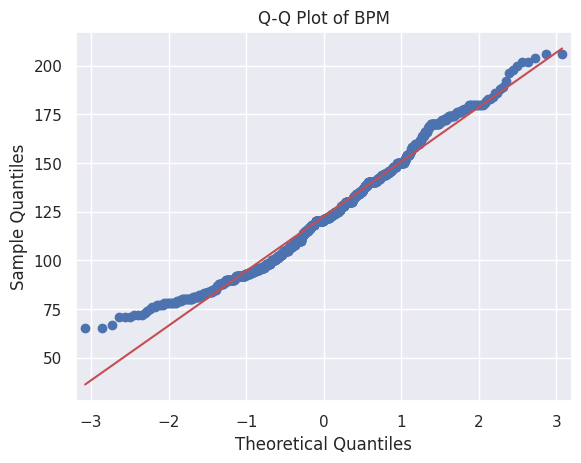

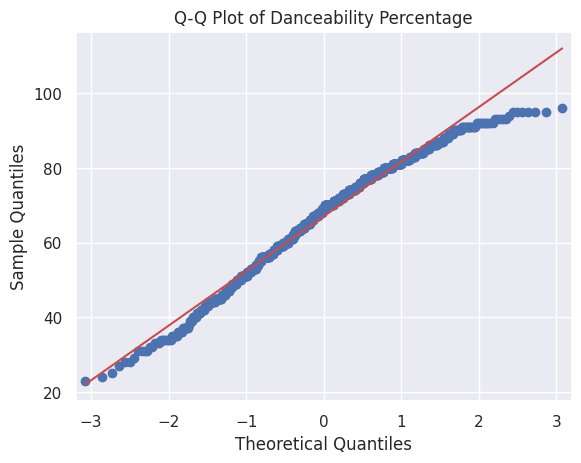

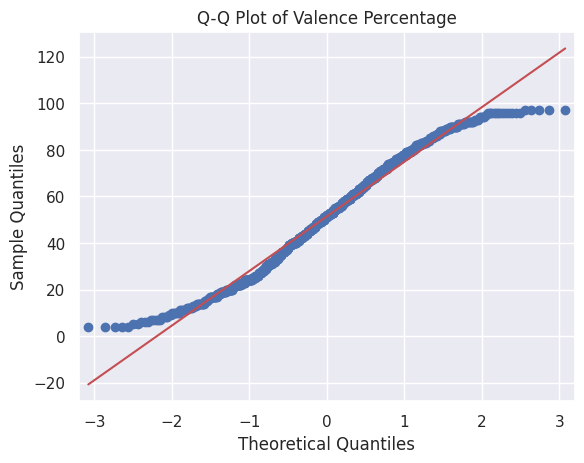

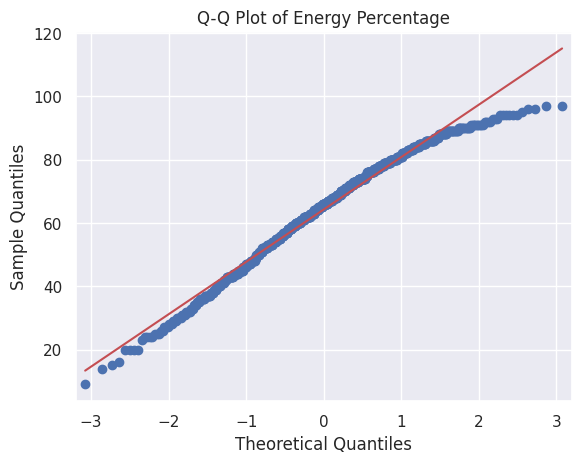

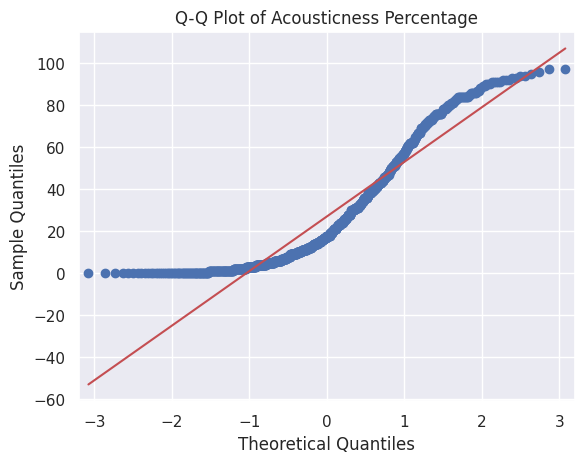

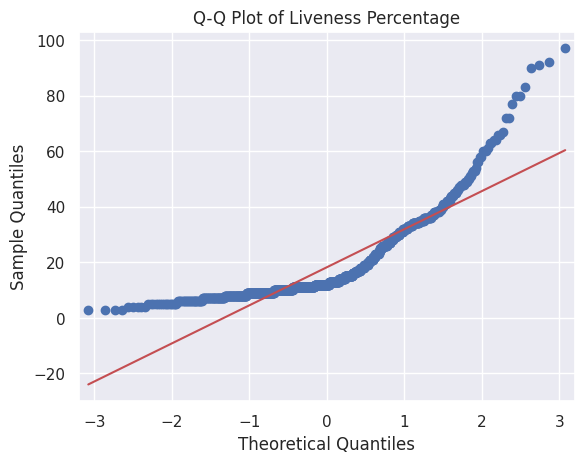

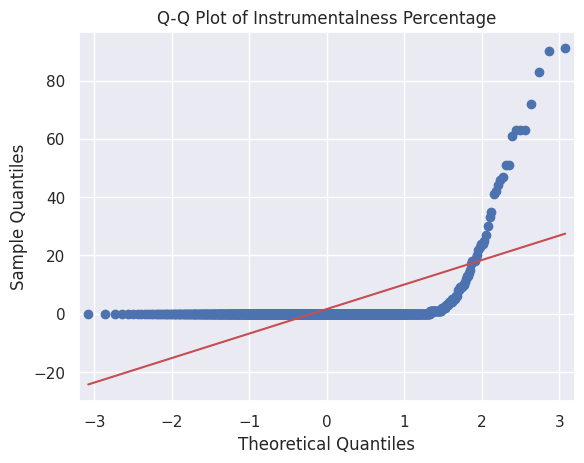

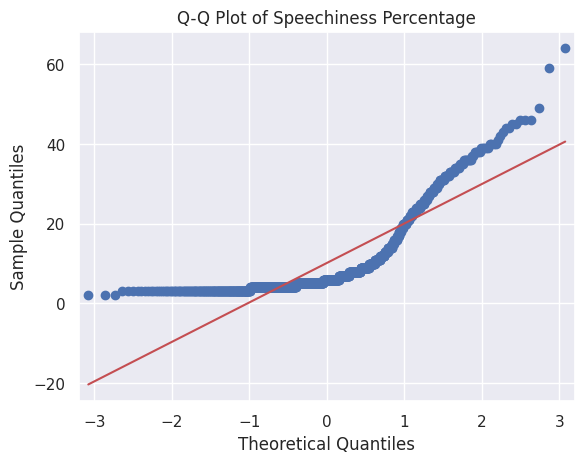

In [319]:
#Q-Q PLOT TO REPRESENT BPM
qqplot(dataset['bpm'], line='s')
plt.title('Q-Q Plot of BPM')
plt.show()

#Q-Q PLOT TO REPRESENT DANCEABILITY
qqplot(dataset['danceability_%'], line='s')
plt.title('Q-Q Plot of Danceability Percentage')
plt.show()

#Q-Q PLOT TO REPRESENT VALENCE
qqplot(dataset['valence_%'], line='s')
plt.title('Q-Q Plot of Valence Percentage')
plt.show()

#Q-Q PLOT TO REPRESENT ENERGY
qqplot(dataset['energy_%'], line='s')
plt.title('Q-Q Plot of Energy Percentage')
plt.show()

#Q-Q PLOT TO REPRESENT ACOUSTICNESS
qqplot(dataset['acousticness_%'], line='s')
plt.title('Q-Q Plot of Acousticness Percentage')
plt.show()

#Q-Q PLOT TO REPRESENT LIVENESS
qqplot(dataset['liveness_%'], line='s')
plt.title('Q-Q Plot of Liveness Percentage')
plt.show()

#Q-Q PLOT TO REPRESENT INSTRUMENTALNESS
qqplot(dataset['instrumentalness_%'], line='s')
plt.title('Q-Q Plot of Instrumentalness Percentage')
plt.show()

#Q-Q PLOT TO REPRESENT SPEECHINESS
qqplot(dataset['speechiness_%'], line='s')
plt.title('Q-Q Plot of Speechiness Percentage')
plt.show()


Except for liveness percentage, instrumentalness percentage and speechiness percentage, the rest of the independent variables roughly follow normal distribution witha few outliers in the front and the end.

PLOTTING A BOX PLOT GRAPH

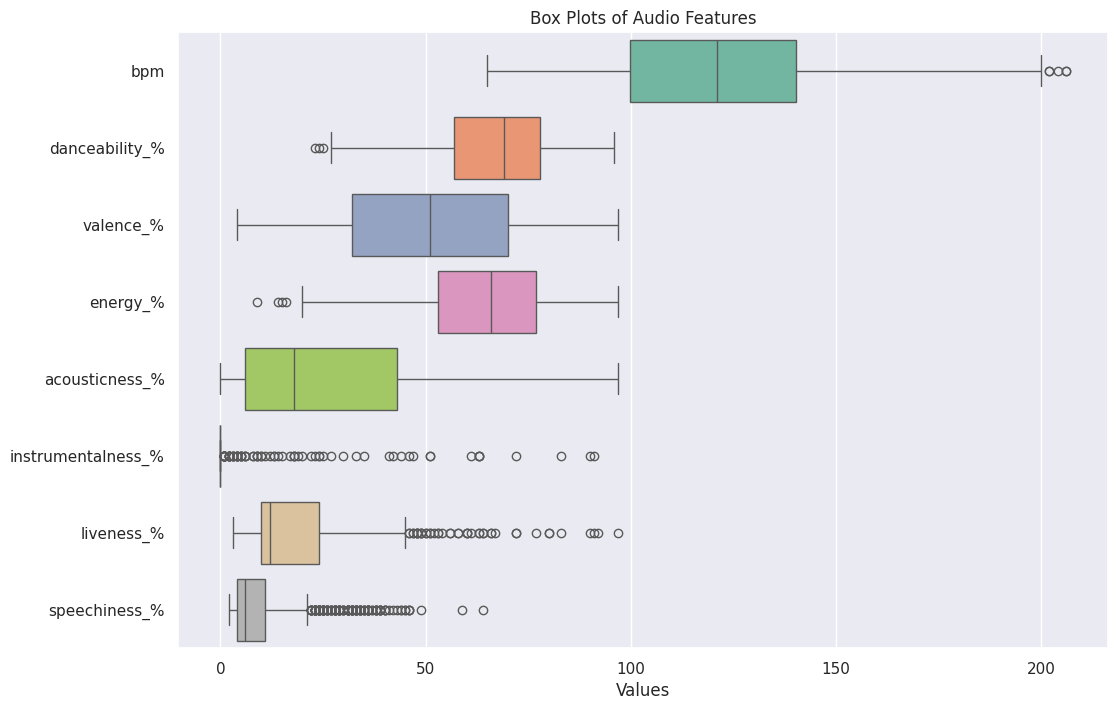

In [320]:
audio_features = dataset[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
plt.figure(figsize=(12, 8))
sns.boxplot(data=audio_features, orient="h", palette="Set2")
plt.title('Box Plots of Audio Features')
plt.xlabel('Values')
plt.show()

Liveness percentage, instrumentalness percentage and speechiness percentage, have outliers and need to be normalized.

In [321]:
dataset = pd.get_dummies(dataset)

# Create x to store scaled values as int
bpm = dataset[["bpm"]].values.astype(int)
danceability = dataset[["danceability_%"]].values.astype(int)
valence = dataset[["valence_%"]].values.astype(int)
energy = dataset[["energy_%"]].values.astype(int)
acousticness = dataset[["acousticness_%"]].values.astype(int)
instrumentalness = dataset[["instrumentalness_%"]].values.astype(int)
liveness = dataset[["liveness_%"]].values.astype(int)
speechiness = dataset[["speechiness_%"]].values.astype(int)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
bpm_scaled = min_max_scaler.fit_transform(bpm)
danceability_scaled = min_max_scaler.fit_transform(danceability)
valence_scaled = min_max_scaler.fit_transform(valence)
energy_scaled = min_max_scaler.fit_transform(energy)
acousticness_scaled = min_max_scaler.fit_transform(acousticness)
instrumentalness_scaled = min_max_scaler.fit_transform(instrumentalness)
liveness_scaled = min_max_scaler.fit_transform(liveness)
speechiness_scaled = min_max_scaler.fit_transform(speechiness)

# Run the normalizer on the dataframe
dataset[["bpm"]] = pd.DataFrame(bpm_scaled)
dataset[["danceability_%"]] = pd.DataFrame(danceability_scaled)
dataset[["valence_%"]] = pd.DataFrame(valence_scaled)
dataset[["energy_%"]] = pd.DataFrame(energy_scaled)
dataset[["acousticness_%"]] = pd.DataFrame(acousticness_scaled)
dataset[["instrumentalness_%"]] = pd.DataFrame(instrumentalness_scaled)
dataset[["liveness_%"]] = pd.DataFrame(liveness_scaled)
dataset[["speechiness_%"]] = pd.DataFrame(speechiness_scaled)


In [322]:
dataset.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,2,2023,7,14,553,147,141381703,43,263,10,...,0,0,0,0,0,0,0,0,1,0
1,1,2023,3,23,1474,48,133716286,48,126,14,...,1,0,0,0,0,0,0,0,1,0
2,1,2023,6,30,1397,113,140003974,94,207,14,...,0,0,0,0,1,0,0,0,1,0
3,1,2019,8,23,7858,100,800840817,116,207,12,...,0,0,0,0,0,0,0,0,1,0
4,1,2023,5,18,3133,50,303236322,84,133,15,...,0,0,0,0,0,0,0,0,0,1


In [323]:
print(dataset.columns)

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts',
       ...
       'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G',
       'key_G#', 'mode_Major', 'mode_Minor'],
      dtype='object', length=2164)


In [324]:
column_names = ['key', 'speechiness_%', 'bpm', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'instrumentalness_%', 'danceability_%']
for column in column_names:
    if column not in dataset.columns:
        print(f"Column '{column}' does not exist in the data frame.")

Column 'key' does not exist in the data frame.


In [325]:
key_missing_count = dataset['key'].isnull().sum() if 'key' in dataset.columns else 0
speechiness_missing_count = dataset['speechiness_%'].isnull().sum() if 'speechiness_%' in dataset.columns else 0
bpm_missing_count = dataset['bpm'].isnull().sum() if 'bpm' in dataset.columns else 0
valence_missing_count = dataset['valence_%'].isnull().sum() if 'valence_%' in dataset.columns else 0
energy_missing_count = dataset['energy_%'].isnull().sum() if 'energy_%' in dataset.columns else 0
acousticness_missing_count = dataset['acousticness_%'].isnull().sum() if 'acousticness_%' in dataset.columns else 0
liveness_missing_count = dataset['liveness_%'].isnull().sum() if 'liveness_%' in dataset.columns else 0
instrumentalness_missing_count = dataset['instrumentalness_%'].isnull().sum() if 'instrumentalness_%' in dataset.columns else 0
danceability_missing_count = dataset['danceability_%'].isnull().sum() if 'danceability_%' in dataset.columns else 0

print(f"Missing values in 'key': {key_missing_count}")
print(f"Missing values in 'speechiness': {speechiness_missing_count}")
print(f"Missing values in 'bpm': {bpm_missing_count}")
print(f"Missing values in 'valence': {valence_missing_count}")
print(f"Missing values in 'energy': {energy_missing_count}")
print(f"Missing values in 'acousticness': {acousticness_missing_count}")
print(f"Missing values in 'liveness': {liveness_missing_count}")
print(f"Missing values in 'instrumentalness': {instrumentalness_missing_count}")
print(f"Missing values in 'danceability': {danceability_missing_count}")

Missing values in 'key': 0
Missing values in 'speechiness': 1
Missing values in 'bpm': 1
Missing values in 'valence': 1
Missing values in 'energy': 1
Missing values in 'acousticness': 1
Missing values in 'liveness': 1
Missing values in 'instrumentalness': 1
Missing values in 'danceability': 1


In [326]:
mean_value = dataset['speechiness_%'].mean()
dataset['speechiness_%'].fillna(mean_value, inplace=True)

mean_value = dataset['valence_%'].mean()
dataset['valence_%'].fillna(mean_value, inplace=True)

mean_value = dataset['energy_%'].mean()
dataset['energy_%'].fillna(mean_value, inplace=True)

mean_value = dataset['bpm'].mean()
dataset['bpm'].fillna(mean_value, inplace=True)

mean_value = dataset['acousticness_%'].mean()
dataset['acousticness_%'].fillna(mean_value, inplace=True)

mean_value = dataset['instrumentalness_%'].mean()
dataset['instrumentalness_%'].fillna(mean_value, inplace=True)

mean_value = dataset['danceability_%'].mean()
dataset['danceability_%'].fillna(mean_value, inplace=True)

mean_value = dataset['liveness_%'].mean()
dataset['liveness_%'].fillna(mean_value, inplace=True)

In [327]:
key_missing_count = dataset['key'].isnull().sum() if 'key' in dataset.columns else 0
speechiness_missing_count = dataset['speechiness_%'].isnull().sum() if 'speechiness_%' in dataset.columns else 0
bpm_missing_count = dataset['bpm'].isnull().sum() if 'bpm' in dataset.columns else 0
valence_missing_count = dataset['valence_%'].isnull().sum() if 'valence_%' in dataset.columns else 0
energy_missing_count = dataset['energy_%'].isnull().sum() if 'energy_%' in dataset.columns else 0
acousticness_missing_count = dataset['acousticness_%'].isnull().sum() if 'acousticness_%' in dataset.columns else 0
liveness_missing_count = dataset['liveness_%'].isnull().sum() if 'liveness_%' in dataset.columns else 0
instrumentalness_missing_count = dataset['instrumentalness_%'].isnull().sum() if 'instrumentalness_%' in dataset.columns else 0
danceability_missing_count = dataset['danceability_%'].isnull().sum() if 'danceability_%' in dataset.columns else 0

print(f"Missing values in 'key': {key_missing_count}")
print(f"Missing values in 'speechiness': {speechiness_missing_count}")
print(f"Missing values in 'bpm': {bpm_missing_count}")
print(f"Missing values in 'valence': {valence_missing_count}")
print(f"Missing values in 'energy': {energy_missing_count}")
print(f"Missing values in 'acousticness': {acousticness_missing_count}")
print(f"Missing values in 'liveness': {liveness_missing_count}")
print(f"Missing values in 'instrumentalness': {instrumentalness_missing_count}")
print(f"Missing values in 'danceability': {danceability_missing_count}")

Missing values in 'key': 0
Missing values in 'speechiness': 0
Missing values in 'bpm': 0
Missing values in 'valence': 0
Missing values in 'energy': 0
Missing values in 'acousticness': 0
Missing values in 'liveness': 0
Missing values in 'instrumentalness': 0
Missing values in 'danceability': 0


**Q4) WHICH INDEPENDENT VARIABLES ARE USELFUL TO PREDICT A TARGET(DEPENDENT VARIABLE)?**

**USE ATLEAST THREE METHODS.**

Method 1:

PERFORMING CORRELATION ANALYSIS

In [328]:
correlations = dataset.corr()['streams'].abs().sort_values(ascending=False)
print(correlations)

streams                         1.000000
in_spotify_playlists            0.789822
in_apple_playlists              0.772063
in_shazam_charts_0              0.336642
in_apple_charts                 0.320234
                                  ...   
track_name_Get Into It (Yuh)    0.000152
in_deezer_playlists_70          0.000126
artist(s)_name_Maluma           0.000028
track_name_Sobrio               0.000028
in_deezer_playlists_104         0.000009
Name: streams, Length: 2164, dtype: float64


Among the audio features, 'speechiness_%', 'danceability_%', 'liveness_%', 'instrumentalness_%', 'valence_%', 'energy_%', 'acousticness_%', and 'bpm' have weak positive correlations with streams. This indicates a subtle relationship between these audio features and the number of streams.

The number of Spotify playlists the song is included in ('in_spotify_playlists') and the number of Apple Music playlists ('in_apple_playlists') have strong positive correlations with the target variable ('streams'). This suggests that songs included in more playlists on these platforms tend to have higher stream counts.


Method 2:



TRAINING USING RANDOM FOREST REGRESSOR

In [329]:
model = RandomForestRegressor(random_state=42)

In [330]:
feature_columns = ['speechiness_%', 'danceability_%', 'liveness_%', 'instrumentalness_%', 'valence_%', 'energy_%', 'acousticness_%', 'bpm']

X = dataset[feature_columns]
y = dataset['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling missing values in the training set
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Convert X_train back to a DataFrame after imputation
X_train = pd.DataFrame(X_train, columns=feature_columns)

# Handling missing values in the test set
X_test = X_test.dropna()  # Drop rows with missing values
X_test = imputer.transform(X_test)  # Use the same imputer for the test set

# Convert X_test back to a DataFrame after imputation
X_test = pd.DataFrame(X_test, columns=feature_columns)

# Assuming model is a RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Fitting the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating and printing RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Getting feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=feature_columns).sort_values(ascending=False)
print(feature_importance)

RMSE: 556678458.6711416
bpm                   0.174840
valence_%             0.154792
acousticness_%        0.152465
danceability_%        0.140976
liveness_%            0.135289
energy_%              0.120845
speechiness_%         0.109392
instrumentalness_%    0.011401
dtype: float64


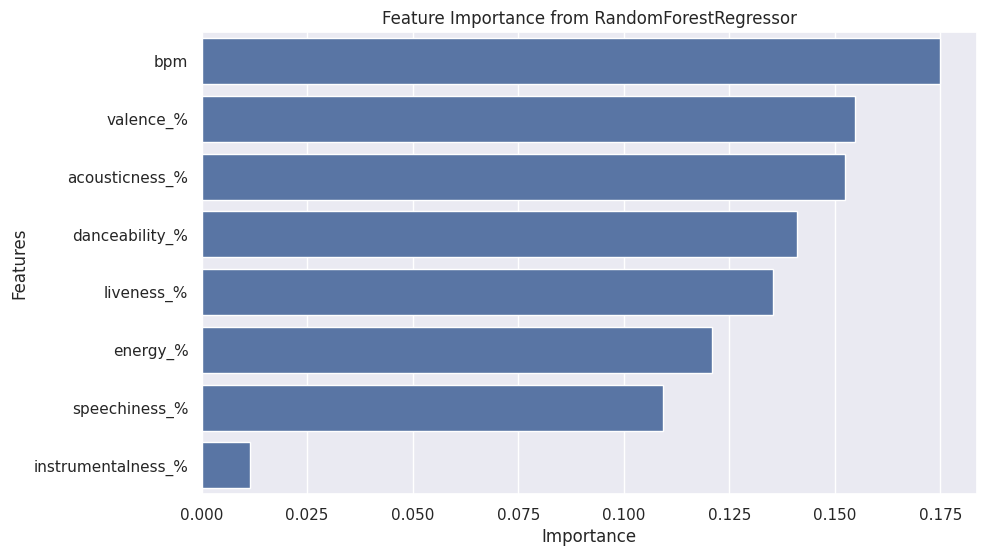

In [331]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)

plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()

The top features contributing to the model are 'bpm,' 'valence_%,' 'acousticness_%,' 'danceability_%,' and 'energy_%,' in descending order of importance.
These features have higher relative importances in predicting the target variable, (i.e) 'streams'

Method 3:

UNIVARIATE FEATURE SELECTION

In [332]:
from sklearn.feature_selection import f_regression, SelectKBest

feature_columns = ['speechiness_%', 'danceability_%', 'liveness_%', 'instrumentalness_%', 'valence_%', 'energy_%', 'acousticness_%', 'bpm']
X = dataset[feature_columns]
y = dataset['streams']

selector = SelectKBest(f_regression, k='all')
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
scores = selector.scores_
print(pd.DataFrame({'Feature': selected_features, 'Score': scores}).sort_values(by='Score', ascending=False))


              Feature     Score
1      danceability_%  7.437175
0       speechiness_%  4.148111
3  instrumentalness_%  2.386121
4           valence_%  0.679637
6      acousticness_%  0.359429
7                 bpm  0.266791
5            energy_%  0.167874
2          liveness_%  0.005481


**Top Influential Features:**

speechiness_% and danceability_%, instrumentalness_% stand out as the most influential features based on their high scores. They have a strong relationship with the target variable.

**Moderate Influential Features:**

acousticness_%, and valence_% have moderate scores, suggesting a moderate impact on the target variable.

**Less Influential Features:**

liveness_%, energy_%, and bpm have lower scores, indicating a comparatively weaker relationship with the target variable.

**Q5) WHICH INDEPENDENT VARIABLE HAVE MISSING DATA? HOW MUCH?**

In [333]:
key_missing_count = dataset['key'].isnull().sum() if 'key' in dataset.columns else 0
speechiness_missing_count = dataset['speechiness_%'].isnull().sum() if 'speechiness_%' in dataset.columns else 0
bpm_missing_count = dataset['bpm'].isnull().sum() if 'bpm' in dataset.columns else 0
valence_missing_count = dataset['valence_%'].isnull().sum() if 'valence_%' in dataset.columns else 0
energy_missing_count = dataset['energy_%'].isnull().sum() if 'energy_%' in dataset.columns else 0
acousticness_missing_count = dataset['acousticness_%'].isnull().sum() if 'acousticness_%' in dataset.columns else 0
liveness_missing_count = dataset['liveness_%'].isnull().sum() if 'liveness_%' in dataset.columns else 0
instrumentalness_missing_count = dataset['instrumentalness_%'].isnull().sum() if 'instrumentalness_%' in dataset.columns else 0
danceability_missing_count = dataset['danceability_%'].isnull().sum() if 'danceability_%' in dataset.columns else 0

print(f"Missing values in 'key': {key_missing_count}")
print(f"Missing values in 'speechiness': {speechiness_missing_count}")
print(f"Missing values in 'bpm': {bpm_missing_count}")
print(f"Missing values in 'valence': {valence_missing_count}")
print(f"Missing values in 'energy': {energy_missing_count}")
print(f"Missing values in 'acousticness': {acousticness_missing_count}")
print(f"Missing values in 'liveness': {liveness_missing_count}")
print(f"Missing values in 'instrumentalness': {instrumentalness_missing_count}")
print(f"Missing values in 'danceability': {danceability_missing_count}")

Missing values in 'key': 0
Missing values in 'speechiness': 0
Missing values in 'bpm': 0
Missing values in 'valence': 0
Missing values in 'energy': 0
Missing values in 'acousticness': 0
Missing values in 'liveness': 0
Missing values in 'instrumentalness': 0
Missing values in 'danceability': 0


All the missing values have been handled.

**Q6) DO THE TRAINING AND TEST SETS HAVE THE SAME DATA?**

In [334]:
X = dataset[ [ 'speechiness_%', 'danceability_%', 'liveness_%', 'instrumentalness_%', 'valence_%', 'energy_%', 'acousticness_%','bpm']]
y = dataset['streams']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)
X_train.head()

,speechiness_%,danceability_%,liveness_%,instrumentalness_%,valence_%,energy_%,acousticness_%,bpm
476,0.048387,0.684932,0.127660,0.0,0.731183,0.261364,0.793814,0.340426
64,0.435484,0.917808,0.074468,0.0,0.387097,0.568182,0.000000,0.234043
223,0.016129,0.589041,0.085106,0.0,0.301075,0.352273,0.835052,0.319149
538,0.016129,0.739726,0.212766,0.0,0.225806,0.602273,0.350515,0.404255
946,0.032258,0.465753,0.053191,0.0,0.548387,0.738636,0.226804,0.219858


In [335]:
(X_train_valid, X_test, y_train_valid, y_test) = train_test_split(X_train, y_train, test_size=0.12, shuffle=False)
print('Shape:')
print('Train-Valid Set -', X_train_valid.shape, y_train_valid.shape)
print('Test Set -', X_test.shape, y_test.shape)

Shape:
Train-Valid Set - (502, 8) (502,)
Test Set - (69, 8) (69,)


**Train-Valid Set:**

Number of samples (rows): 502
Number of features (columns): 8
Target variable shape: (502,) - There is a one-dimensional array for the target variable.

**Test Set:**

Number of samples (rows): 69
Number of features (columns): 8
Target variable shape: (69,) - Similar to the Train-Valid Set, There is a one-dimensional array for the target variable.


**Q7) ARE THE PREDICTOR VARIABLES ARE INDEPENDENT OF ALL THE OTHER PREDICTOR VARIBALES?**

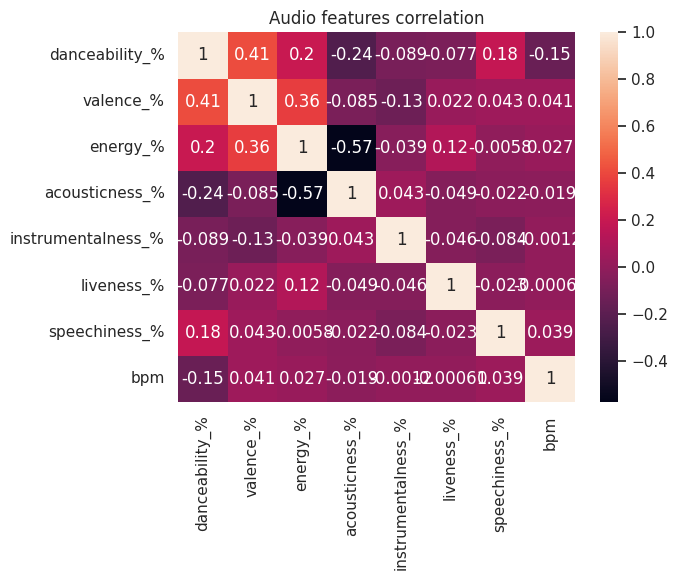

In [336]:
feature_columns = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%", 'bpm']
feature_matrix = dataset[feature_columns].corr()
sns.heatmap(feature_matrix,annot = True)
plt.title("Audio features correlation")
plt.show()

From the above plot, we see that energy and acousticness don't go well together and are negatively correlated.

Valence and danceability have a good postive correlation with each other.

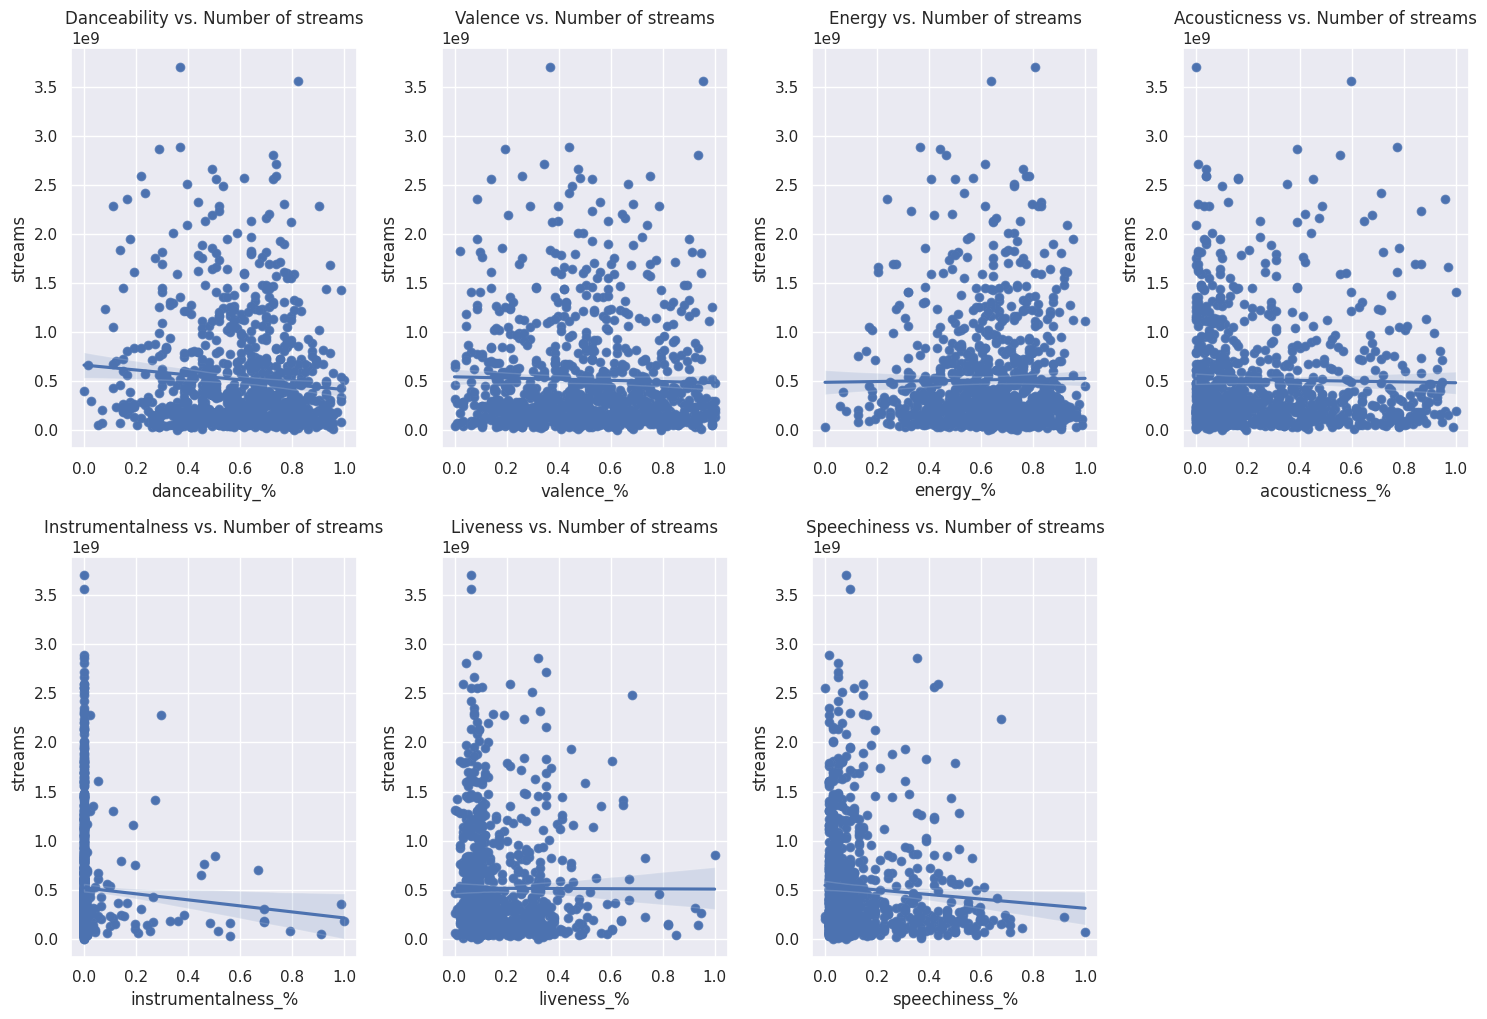

In [337]:
plt.figure(figsize=(15,20))
for i, feature in enumerate(feature_columns[:len(feature_columns)-1], start=1):
    plt.subplot(4,4, i)
    plt.title(feature.replace("_%","").capitalize() + " vs. Number of streams")
    plt.ylabel('Streams (in billions)')
    plt.xlabel(feature.replace("_%","").capitalize())
    sns.scatterplot(x=dataset[feature], y=dataset['streams'])
    sns.regplot(x=dataset[feature], y=dataset['streams'])
plt.tight_layout()

From the above plot, Speechiness and Streams are negatively correlated and also
Instrumentalness and Streams are negatively correlated.

**Q8) WHICH PREDICTOR VARIABLES ARE THE MOST IMPORTANT?**

To sum up all the analysis, 'bpm' and 'danceability', 'energy' and 'valence' are the most important audio features that contibute to the success of a song.

**Q9) DO THE RANGE OF PREDICTOR VARIABLES MAKE SENSE?**

In [338]:
descriptive_stats = dataset[feature_columns].describe()
print(descriptive_stats)

       danceability_%   valence_%    energy_%  acousticness_%  \
count      952.000000  952.000000  952.000000      952.000000   
mean         0.602380    0.509402    0.628525        0.278426   
std          0.200379    0.252253    0.187740        0.267093   
min          0.000000    0.000000    0.000000        0.000000   
25%          0.465753    0.301075    0.500000        0.061856   
50%          0.630137    0.505376    0.647727        0.185567   
75%          0.753425    0.709677    0.772727        0.443299   
max          1.000000    1.000000    1.000000        1.000000   

       instrumentalness_%  liveness_%  speechiness_%         bpm  
count          952.000000  952.000000     952.000000  952.000000  
mean             0.017414    0.161912       0.131356    0.408081  
std              0.092461    0.145929       0.159903    0.199051  
min              0.000000    0.000000       0.000000    0.000000  
25%              0.000000    0.074468       0.032258    0.246454  
50%         

On seeing the provided output, the ranges of the predictor variables appear reasonable and align with their expected interpretations in the context of musical features.

**Q10) WHAT ARE THE DISTRIBUTIONS OF THE PREDICTOR VARIABLES?**

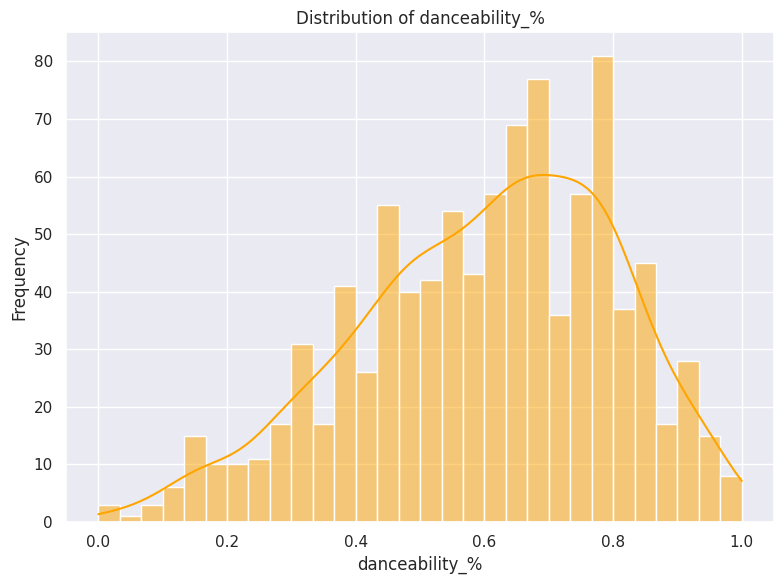

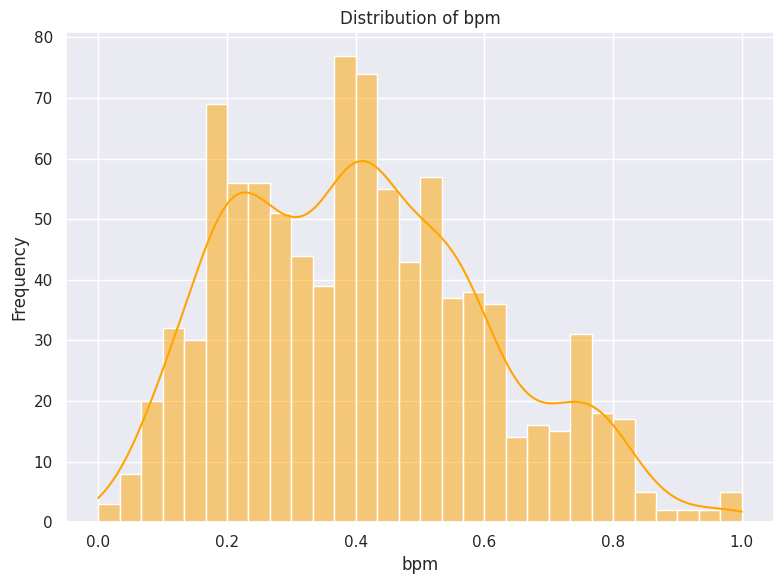

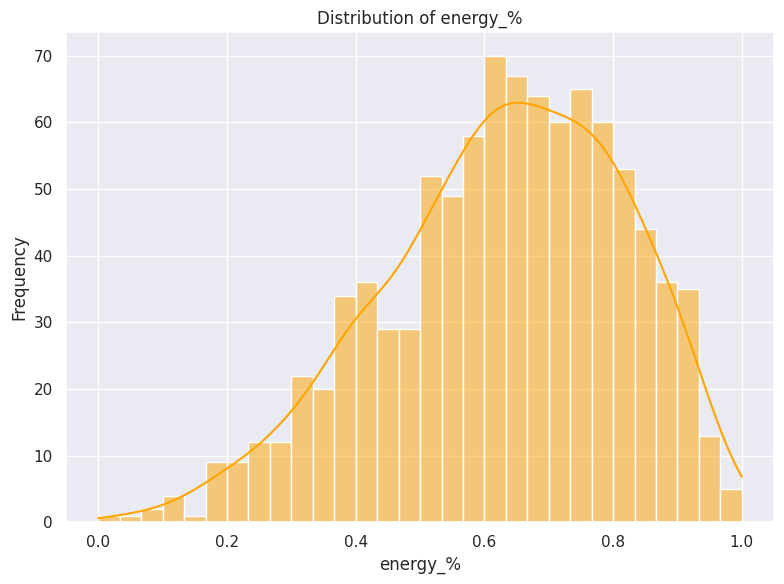

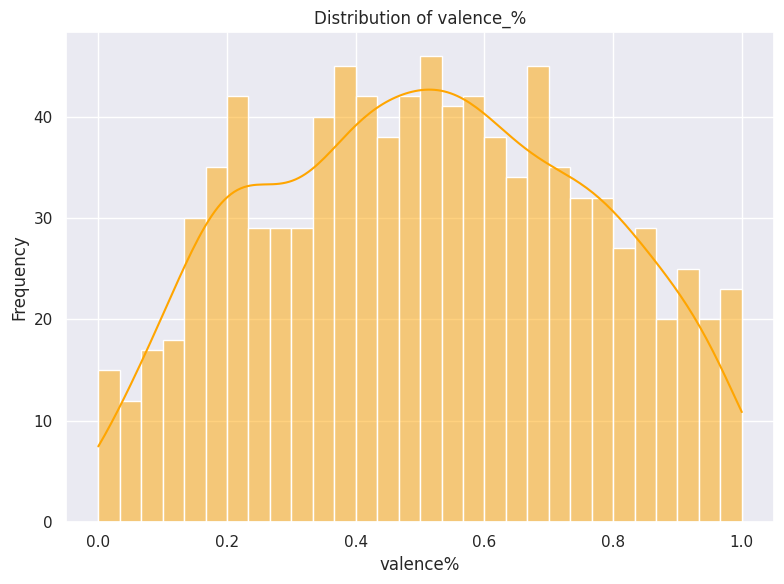

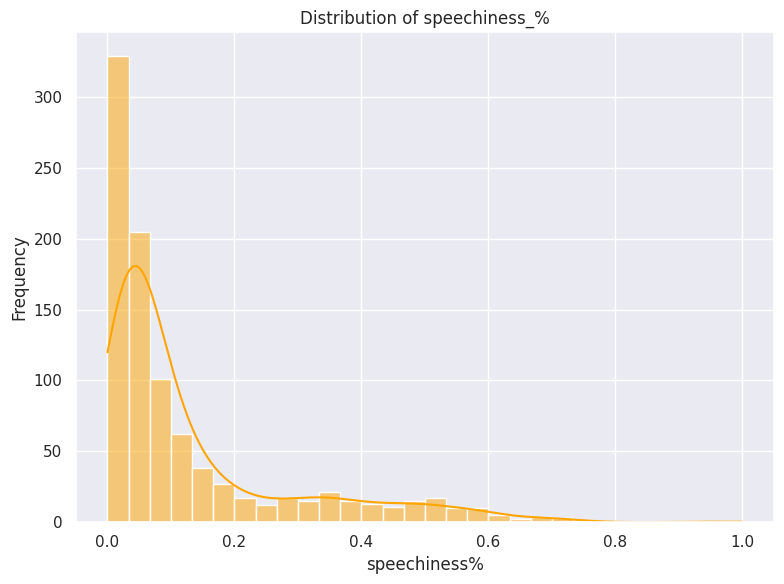

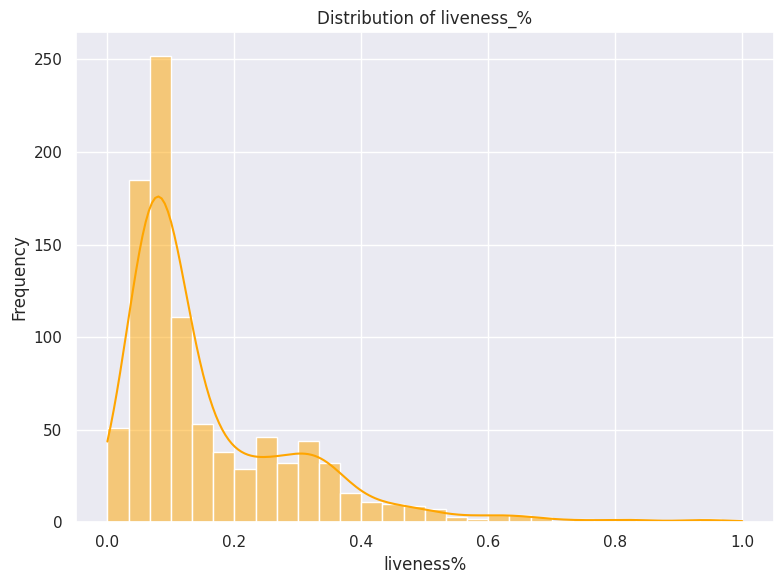

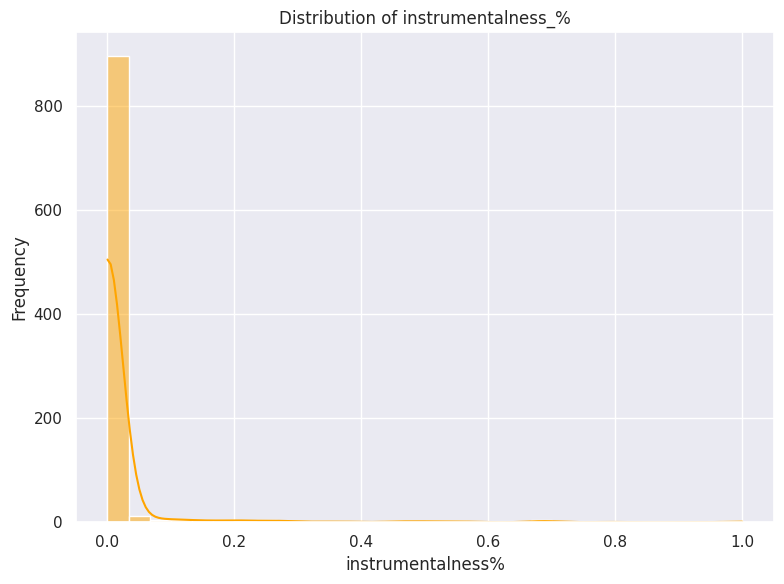

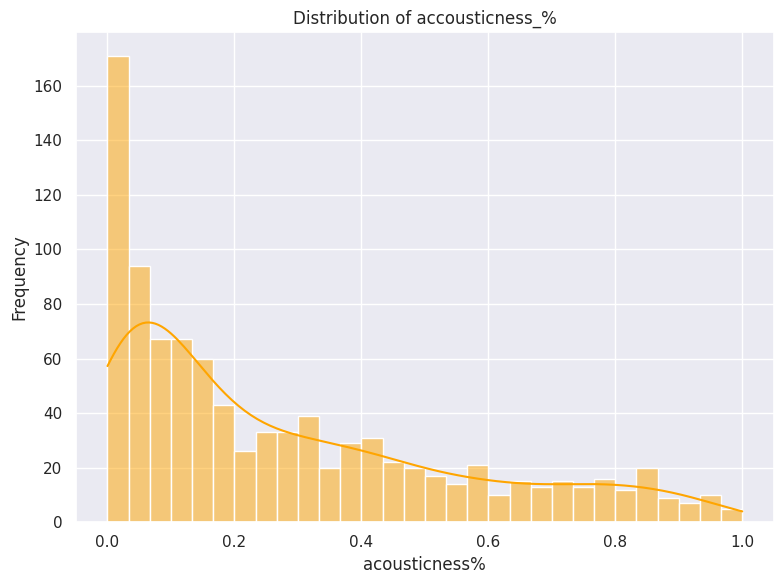

In [339]:
# 1) DANCEABILITY PERCENTAGE
predictor_data = dataset['danceability_%']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.histplot(predictor_data, kde=True, ax=axes, color='orange', bins=30)
axes.set_title('Distribution of danceability_%')
axes.set_xlabel('danceability_%')
axes.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2) BPM
predictor_data = dataset['bpm']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.histplot(predictor_data, kde=True, ax=axes, color='orange', bins=30)
axes.set_title('Distribution of bpm')
axes.set_xlabel('bpm')
axes.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3) ENERGY PERCENTAGE
predictor_data = dataset['energy_%']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.histplot(predictor_data, kde=True, ax=axes, color='orange', bins=30)
axes.set_title('Distribution of energy_%')
axes.set_xlabel('energy_%')
axes.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4) VALENCE PERCENTAGE
predictor_data = dataset['valence_%']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# Plot histogram or kernel density plot for the predictor variable
sns.histplot(predictor_data, kde=True, ax=axes, color='orange', bins=30)
axes.set_title('Distribution of valence_%')
axes.set_xlabel('valence%')
axes.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 5) SPEECHINESS PERCENTAGE
predictor_data = dataset['speechiness_%']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.histplot(predictor_data, kde=True, ax=axes, color='orange', bins=30)
axes.set_title('Distribution of speechiness_%')
axes.set_xlabel('speechiness%')
axes.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 6) LIVENESS PERCENTAGE
predictor_data = dataset['liveness_%']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.histplot(predictor_data, kde=True, ax=axes, color='orange', bins=30)
axes.set_title('Distribution of liveness_%')
axes.set_xlabel('liveness%')
axes.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 7) INSTRUMENTALNESS PERCENTAGE
predictor_data = dataset['instrumentalness_%']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.histplot(predictor_data, kde=True, ax=axes, color='orange', bins=30)
axes.set_title('Distribution of instrumentalness_%')
axes.set_xlabel('instrumentalness%')
axes.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 8) ACOUSTICNESS PERCENTAGE
predictor_data = dataset['acousticness_%']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.histplot(predictor_data, kde=True, ax=axes, color='orange', bins=30)
axes.set_title('Distribution of accousticness_%')
axes.set_xlabel('acousticness%')
axes.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Q11) REMOVE OUTLIERS AND KEEP OUTLIER. DOES IT HAVE AN EFFECT ON THE FINAL PREDICTIVE MODEL?**

In [340]:
# Removing outliers

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

predictor_variables = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%", 'bpm']
# Split the dataset into predictor variables (X) and target variable (y)
X = dataset[predictor_variables]
y = dataset["streams"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model without removing outliers
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_with_outliers = mean_squared_error(y_test, y_pred)

# Train a linear regression model after removing outliers
# Define a function to remove outliers based on z-scores
def remove_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return data[(z_scores.abs() < threshold).all(axis=1)]

# Remove outliers from the training set
X_train_no_outliers = remove_outliers_zscore(X_train)
y_train_no_outliers = y_train[X_train.index.isin(X_train_no_outliers.index)]

# Train the model without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predict on the test set after removing outliers
y_pred_no_outliers = model_no_outliers.predict(X_test)
mse_without_outliers = mean_squared_error(y_test, y_pred_no_outliers)

print("Mean Squared Error with outliers:", mse_with_outliers)
print("Mean Squared Error without outliers:", mse_without_outliers)

Mean Squared Error with outliers: 2.4699740212973037e+17
Mean Squared Error without outliers: 2.5227400820721616e+17


Mean squared error with the outliers and without the outliers do not have a significant difference.

**Q12) REMOVE 1%, 5%, AND 10% OF YOUR DATA RANDOMLY AND IMPUTE THE VALUES BACK USING AT LEAST 3 IMPUTATION METHODS. HOW WELL DID THE METHODS RECOVER THE MISSING VALUES?  THAT IS REMOVE SOME DATA, CHECK THE % ERROR ON RESIDUALS FOR NUMERIC DATA AND CHECK FOR BIAS AND VARIANCE OF THE ERROR.**



In [341]:
import numpy as np
from sklearn.metrics import mean_squared_error

def get_MSE_by_imputing_missing_values(temp, feature, fraction_to_miss):
    # Creating one more feature to remove 1% values from it.
    temp[f'{feature}_imputed'] = temp[feature]

    # Imputing 10% of Feature_imputed with Null values
    temp.loc[temp.sample(frac=fraction_to_miss).index, feature] = np.NaN
    print(f"\n Missing values count before imputting with Mean: {temp[feature].isnull().sum()}")

    print("\n IMPUTING WITH MEAN: ")
    # Imputing with Mean.
    temp[feature] = temp[feature].fillna(temp[feature].mean())
    print(f"\n Missing values count After imputting with Mean: {temp[feature].isnull().sum()}")
    mse_mean = mean_squared_error(temp[feature], temp[f'{feature}_imputed'])
    print(f"\n Mean Squared Error by Imputing with Mean of same Feature: {mse_mean.round(4)}")

    # Imputing Feature_imputed with Null values
    temp.loc[temp.sample(frac=fraction_to_miss).index, feature] = np.NaN
    print(f"\n Missing values count before imputting with Median: {temp[feature].isnull().sum()}")

    print("\n IMPUTING WITH MEDIAN:")
    # Imputing with Median.
    temp[feature] = temp[feature].fillna(temp[feature].median())
    print(f"\n Missing values count: {temp[feature].isnull().sum()}")
    mse_median = mean_squared_error(temp[feature], temp[f'{feature}_imputed'])
    print(f"\n Mean Squared Error by Imputing with Median of same Feature: {mse_median.round(4)}")

    # Imputing Feature_imputed with Null values
    temp.loc[temp.sample(frac=fraction_to_miss).index, feature] = np.NaN
    print(f"\n IMPUTING WITH MEAN SQUARED ERROR:")
    # Imputing with Mean Squared Error.
    mse_impute_values = temp[feature].mean()  # Use any other strategy for imputing with MSE.
    temp[feature] = temp[feature].fillna(mse_impute_values)
    print(f"\n Missing values count: {temp[feature].isnull().sum()}")
    mse_mse = mean_squared_error(temp[feature], temp[f'{feature}_imputed'])
    print(f"\n Mean Squared Error by Imputing with MSE of same Feature: {mse_mse.round(4)}")




In [342]:
temp = dataset.copy()

# 1% REMOVAL
feature = 'bpm'
fraction_to_miss = 0.01

print("\n ORIGINAL DATAFRAME: ")
print(f"\n Missing values count in {feature}: {temp[feature].isnull().sum()}")

get_MSE_by_imputing_missing_values(temp, feature, fraction_to_miss)



 ORIGINAL DATAFRAME: 

 Missing values count in bpm: 0

 Missing values count before imputting with Mean: 10

 IMPUTING WITH MEAN: 

 Missing values count After imputting with Mean: 0

 Mean Squared Error by Imputing with Mean of same Feature: 0.0004

 Missing values count before imputting with Median: 10

 IMPUTING WITH MEDIAN:

 Missing values count: 0

 Mean Squared Error by Imputing with Median of same Feature: 0.0008

 IMPUTING WITH MEAN SQUARED ERROR:

 Missing values count: 0

 Mean Squared Error by Imputing with MSE of same Feature: 0.0011


In [343]:
temp = dataset.copy()

# 5% REMOVAL
feature = 'bpm'
fraction_to_miss = 0.05

print("\n ORIGINAL DATAFRAME:")
print(f"\n Missing values count in {feature}: {temp[feature].isnull().sum()}")

get_MSE_by_imputing_missing_values(temp, feature, fraction_to_miss)



 ORIGINAL DATAFRAME:

 Missing values count in bpm: 0

 Missing values count before imputting with Mean: 48

 IMPUTING WITH MEAN: 

 Missing values count After imputting with Mean: 0

 Mean Squared Error by Imputing with Mean of same Feature: 0.002

 Missing values count before imputting with Median: 48

 IMPUTING WITH MEDIAN:

 Missing values count: 0

 Mean Squared Error by Imputing with Median of same Feature: 0.004

 IMPUTING WITH MEAN SQUARED ERROR:

 Missing values count: 0

 Mean Squared Error by Imputing with MSE of same Feature: 0.006


In [344]:
temp = dataset.copy()

# 10% REMOVAL
feature = 'bpm'
fraction_to_miss = 0.1

print("\n ORIGINAL DATAFRAME:")
print(f"\n Missing values count in {feature}: {temp[feature].isnull().sum()}")

get_MSE_by_imputing_missing_values(temp, feature, fraction_to_miss)



 ORIGINAL DATAFRAME:

 Missing values count in bpm: 0

 Missing values count before imputting with Mean: 95

 IMPUTING WITH MEAN: 

 Missing values count After imputting with Mean: 0

 Mean Squared Error by Imputing with Mean of same Feature: 0.0032

 Missing values count before imputting with Median: 95

 IMPUTING WITH MEDIAN:

 Missing values count: 0

 Mean Squared Error by Imputing with Median of same Feature: 0.0067

 IMPUTING WITH MEAN SQUARED ERROR:

 Missing values count: 0

 Mean Squared Error by Imputing with MSE of same Feature: 0.0099


**CITATIONS AND REFRENCES:**

1) Many techniques used in this notebook have been adapted from the following github repository:

Owner - AI Skunkworks - Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown

Link - https://github.com/nikbearbrown/

2) Took refrence from ChaptGPT for understanding some of the questions and for syntaxes and corrections.

3) Code corrections have also been made using Colab AI that supports generating code from natural language and a code-assisting chatbot.

4) Dataset has been utilized from Kaggle

URL: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

**MIT License**

**Copyright (c) 2024: lakshmi14k**

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

**THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.**